# Observations
1. The top 2 drug regimens, Ramicane and Capomulin, had the highest amounts of timepoints, which may have influenced why the standard deviation was the lowest out of all the drug regimens.
2. There is an even distrbution between male and female mice, which helped answer the question of how the drugs would effect each gender.
3. The correlation between mice weight and tumor volume seems so be a strongly positive on which suggests that the higher the tumor volume, the higher the weight of the mouse.

In [55]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mouse_study['Mouse ID'].nunique()


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_study[mouse_study.duplicated(['Mouse ID', 'Timepoint'], keep= False)]
duplicate_mice['Mouse ID'].unique()


array(['g989'], dtype=object)

In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_clean = mouse_study[mouse_study['Mouse ID']!= 'g989']
real_mice = mouse_clean['Mouse ID'].nunique()
real_mice

248

## Summary Statistics

In [5]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = mouse_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
median = mouse_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
variance = mouse_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
standard_deviation = mouse_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
SEM = mouse_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()
stats_df = pd.DataFrame ({ "Mean": mean,
                         'Median': median,
                         'Variance': variance,
                         'Standard Deviation': standard_deviation,
                         'SEM': SEM})
stats_df




,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [6]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
stats_df2 = mouse_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg([np.mean, np.median, np.std, np.var, 'sem'])
stats_df2

,mean,median,std,var,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

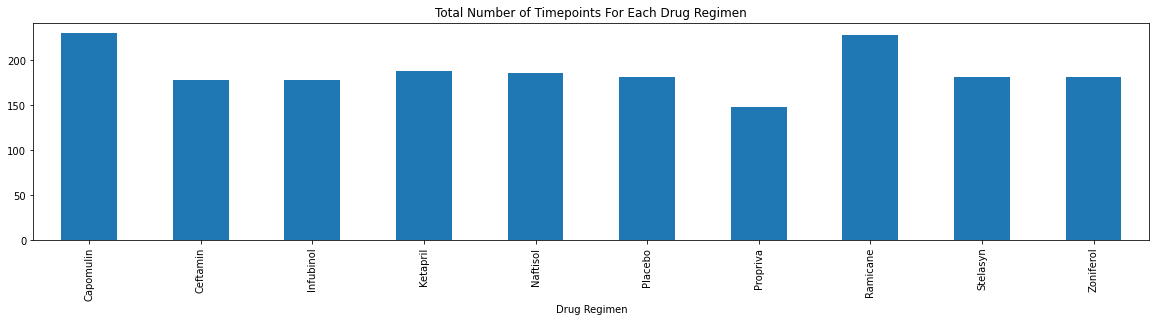

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
total_timepoints = mouse_clean.groupby(['Drug Regimen'])['Timepoint'].count()
total_timepoints.plot(kind="bar", figsize=(20,4))
plt.title('Total Number of Timepoints For Each Drug Regimen')
plt.show()

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
#x_axis= mouse_clean['Drug Regimen']
#y_axis = mouse_clean.groupby(['Drug Regimen'])['Timepoint'].count()
#plt.bar(x_axis, y_axis, color='b', alpha=0.8, align='center')

Text(0.5, 0, 'Drug Regimen')

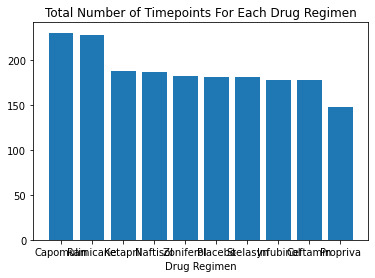

In [17]:
y_axis = mouse_clean['Drug Regimen'].value_counts()
x_axis = y_axis.index
plt.bar(x_axis, y_axis)
plt.title('Total Number of Timepoints For Each Drug Regimen')
plt.xlabel('Drug Regimen')

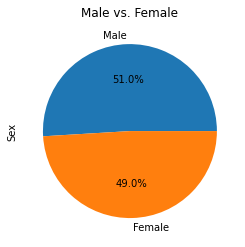

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
m_vs_f = mouse_clean['Sex'].value_counts()
plt.title('Male vs. Female')
m_vs_f.plot.pie(autopct= "%1.1f%%")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

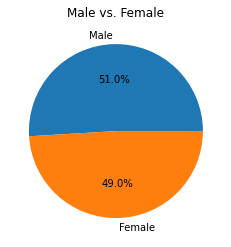

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
x_axis = mouse_clean['Sex'].unique()
plt.pie(m_vs_f, labels=x_axis, autopct= '%1.1f%%')
plt.title('Male vs. Female')
plt.show


## Quartiles, Outliers and Boxplots

In [35]:
# For Ramicane
# ramicane_data = mouse_clean.loc[mouse_clean['Drug Regimen'] == 'Ramicane',:]
# ramicane_greatest = pd.DataFrame(ramicane_data.groupby('Mouse ID').max()['Timepoint'])
# ramicane_df = mouse_clean.copy()
# ramicane_merged = pd.merge(ramicane_greatest, ramicane_df, on=('Mouse ID', 'Timepoint'), how='left')

# ramicane_merged.head()

In [36]:
# #For Infubinol
# infubinol_data = mouse_clean.loc[mouse_clean['Drug Regimen'] == 'Infubinol',:]
# infubinol_greatest = pd.DataFrame(infubinol_data.groupby('Mouse ID').max()['Timepoint'])
# infubinol_df = mouse_clean.copy()
# infubinol_merged = pd.merge(infubinol_greatest, infubinol_df, on=('Mouse ID', 'Timepoint'), how='left')

# infubinol_merged.head()


In [37]:
# # For Ceftamin
# ceftamin_data = mouse_clean.loc[mouse_clean['Drug Regimen'] == 'Ceftamin',:]
# ceftamin_greatest = pd.DataFrame(ceftamin_data.groupby('Mouse ID').max()['Timepoint'])
# ceftamin_df = mouse_clean.copy()
# ceftamin_merged = pd.merge(ceftamin_greatest, ceftamin_df, on=('Mouse ID', 'Timepoint'), how='left')

# ceftamin_merged.head()

In [34]:
# #For Capomulin
# capomulin_data = mouse_clean.loc[mouse_clean['Drug Regimen'] == 'Capomulin',:]
# capomulin_greatest = pd.DataFrame(capomulin_data.groupby('Mouse ID').max()['Timepoint'])
# capomulin_df = mouse_clean.copy()
# capomulin_merged = pd.merge(capomulin_greatest, capomulin_df, on=('Mouse ID', 'Timepoint'), how='left')

# capomulin_merged



In [26]:
top_4 = mouse_clean.loc[(mouse_clean["Drug Regimen"] == "Capomulin") | (
    mouse_clean["Drug Regimen"] == "Ramicane") | (mouse_clean["Drug Regimen"] == "Infubinol") | (mouse_clean["Drug Regimen"] == "Ceftamin"), :]

In [27]:
top_4

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


In [30]:
timepoint_greatest = pd.DataFrame(top_4.groupby('Mouse ID').max()['Timepoint'])
timepoint_greatest

,Timepoint
Mouse ID,
a203,45
a251,45
a275,45
a411,45
a444,45
...,...
y769,45
y793,45
y865,45


In [33]:
top_4_merged = pd.merge(timepoint_greatest, mouse_clean, how = 'left', on= ['Timepoint', 'Mouse ID'])
top_4_merged

,Timepoint,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,45,a203,Infubinol,Female,20,23,67.973419,2
1,45,a251,Infubinol,Female,21,25,65.525743,1
2,45,a275,Ceftamin,Female,20,28,62.999356,3
3,45,a411,Ramicane,Male,3,22,38.407618,1
4,45,a444,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,45,y769,Ceftamin,Female,6,27,68.594745,4
96,45,y793,Capomulin,Male,17,17,31.896238,2
97,45,y865,Ceftamin,Male,23,26,64.729837,3
98,45,z578,Ramicane,Male,11,16,30.638696,0


In [38]:
treatments_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_volume_data = []

for treatment in treatments_list:
    tumor_volume = top_4_merged.loc[top_4_merged['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    tumor_volume_data.append(tumor_volume)
    

In [40]:
len(tumor_volume_data)

4

In [42]:
# Determining an outliers and 
quartiles = tumor_volume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volumes is: {lowerq}")
print(f"The upper quartile of tumor volumes is: {upperq}")
print(f"The interquartile range of tumor volumes is: {iqr}")
print(f"The median of tumor volumes is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

# tumor_outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]

The lower quartile of tumor volumes is: 48.72207785
The upper quartile of tumor volumes is: 64.29983003
The interquartile range of tumor volumes is: 15.577752179999997
The median of tumor volumes is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


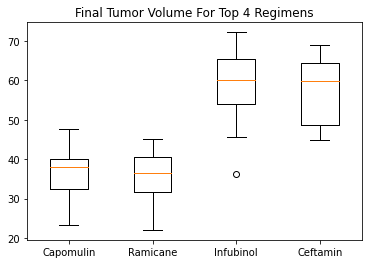

In [44]:
fig7, ax7 = plt.subplots()
ax7.set_title('Final Tumor Volume For Top 4 Regimens')
ax7.boxplot(tumor_volume_data, labels=treatments_list)

plt.show()

Text(0, 0.5, 'Tumor Volume')

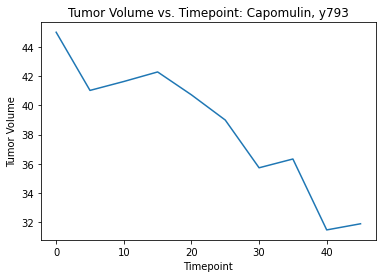

In [47]:
# A mouse that was treated with capomulin line plot
y793 = mouse_clean.loc[mouse_clean['Drug Regimen'] == 'Capomulin'].loc[mouse_clean['Mouse ID'] == 'y793']
plt.plot(y793['Timepoint'], y793['Tumor Volume (mm3)'])
plt.show
plt.title('Tumor Volume vs. Timepoint: Capomulin, y793')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')

<function matplotlib.pyplot.show(close=None, block=None)>

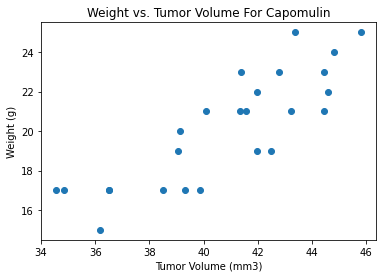

In [53]:
# scatter plot of tumor volume versus mouse weight for the Capomulin treatment regimen
capomulin_scatter = mouse_clean.loc[mouse_clean['Drug Regimen'] == 'Capomulin']
avg = capomulin_scatter.groupby(['Mouse ID']).mean()

plt.scatter(avg['Tumor Volume (mm3)'], avg['Weight (g)'])
plt.title('Weight vs. Tumor Volume For Capomulin')
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Weight (g)')
plt.show

In [54]:
#correlation coefficient and linear regression model between mouse weight
#and average tumor volume for the Capomulin treatment
weight = avg['Weight (g)']
tumor_vol2 = avg['Tumor Volume (mm3)']
correlation = st.pearsonr(weight,tumor_vol2)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


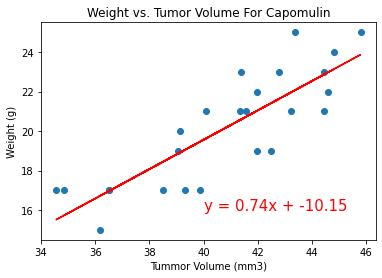

In [58]:
x_values = avg['Tumor Volume (mm3)']
y_values = avg['Weight (g)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,16),fontsize=15,color="red")
plt.xlabel('Tummor Volume (mm3)')
plt.ylabel('Weight (g)')
plt.title('Weight vs. Tumor Volume For Capomulin')
plt.show()